# Establish connection to MySQL

In [90]:
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import ast
from sqlalchemy import create_engine
from collections import Counter

In [91]:
# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mYsT4nd4rdQu3rYL4ngu4g3",
    database="anime_database"
)

# Score Distribution

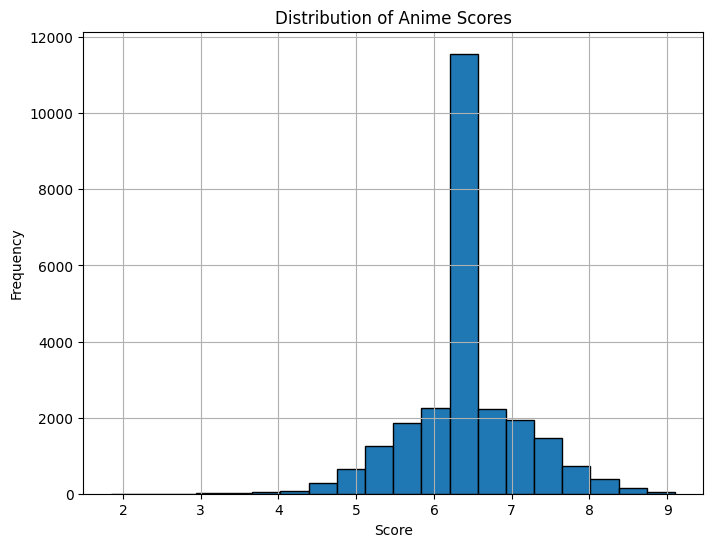

In [18]:
# Query to fetch anime scores
query_scores = "SELECT score FROM anime_data"

# Execute query
cursor = conn.cursor()
cursor.execute(query_scores)

# Fetch all scores
scores = cursor.fetchall()

# Close cursor and connection
cursor.close()
conn.close()

# Extract scores from result
scores = [score[0] for score in scores]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=20, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Scores')
plt.grid(True)
plt.show()

# Scatter Plot of Number of Episodes vs. Score

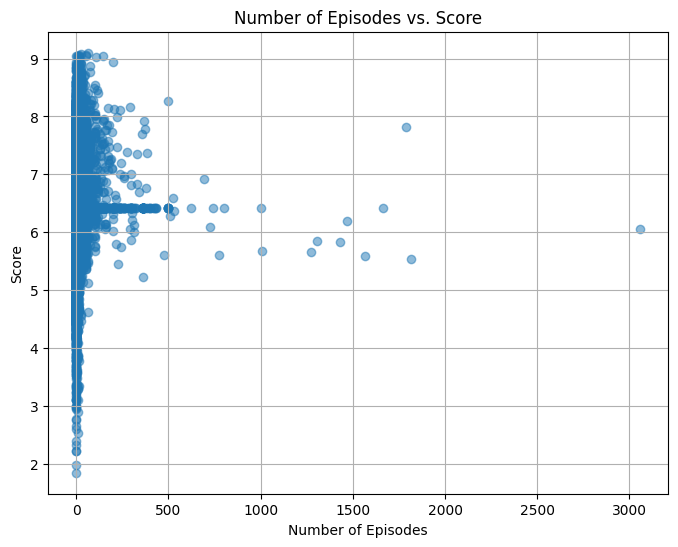

In [21]:
# Query to fetch number of episodes and scores
query_episodes_scores = "SELECT episodes, score FROM anime_data"

# Execute query
cursor = conn.cursor()
cursor.execute(query_episodes_scores)

# Fetch all data
data = cursor.fetchall()

# Close cursor and connection
cursor.close()
conn.close()

# Extract episodes and scores
episodes = [item[0] for item in data]
scores = [item[1] for item in data]

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(episodes, scores, alpha=0.5)
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.title('Number of Episodes vs. Score')
plt.grid(True)
plt.show()

# Genre Popularity

C:\Users\Christian\AppData\Local\Temp\ipykernel_21940\1710337841.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  anime = pd.read_sql(query_genres, con=conn)


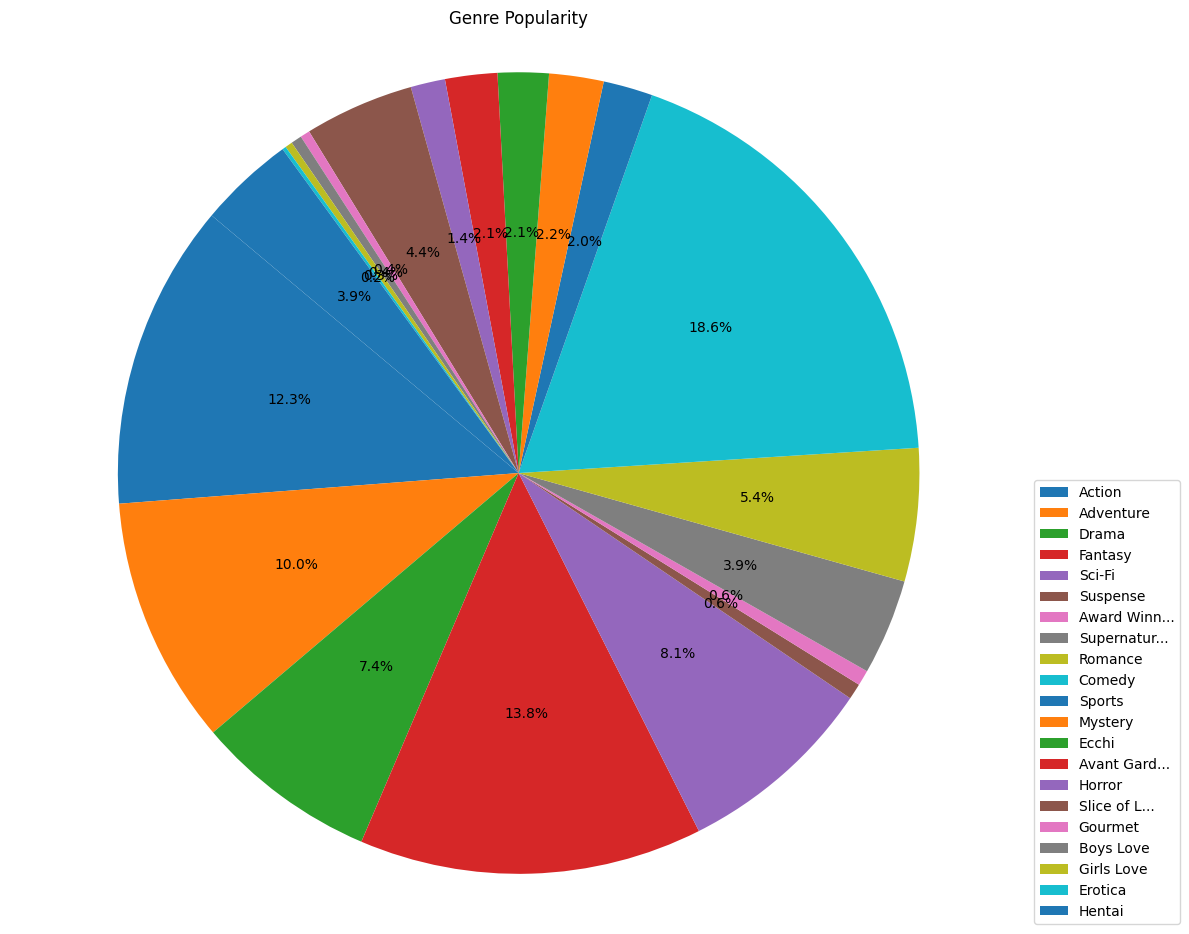

In [92]:
# Query to fetch genres
query_genres = "SELECT genres FROM anime_data"

# Fetch data into a pandas DataFrame
anime = pd.read_sql(query_genres, con=conn)

# Function to count unique genres
def count_genres(genres_list):
    genre_counts = Counter()
    for genres in genres_list:
        # Convert the string representation of a list into an actual list
        genres = ast.literal_eval(genres)
        for genre in genres:
            genre_counts[genre.strip()] += 1
    return genre_counts

# Count genre occurrences
genre_counts = count_genres(anime['genres'])

# Shorten or abbreviate genre names for the legend
shortened_genre_names = {genre: (genre[:10] + '...' if len(genre) > 10 else genre) for genre in genre_counts.keys()}

# Plotting the pie chart for genre popularity
plt.figure(figsize=(12, 10))
plt.pie(genre_counts.values(), labels=None, autopct='%1.1f%%', startangle=140)
plt.legend([shortened_genre_names[genre] for genre in genre_counts.keys()], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Genre Popularity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Close MySQL connection
conn.close()